<a href="https://colab.research.google.com/github/Kalyani2022/Kalyani2022/blob/main/Copy_of_Python_Machine_Learning_Tips_Decision_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ML Tips - Decision Forest
https://archive.ics.uci.edu/ml/datasets/Concrete+Compressive+Strength

[Data Science Teacher Brandyn YouTube Channel](https://www.youtube.com/@data_science_teacher_brandyn)

[One on one time with Data Science Teacher Brandyn](https://www.datasimple.education/one-on-one-data-classes)


Follow Data Science Teacher Brandyn:

[On Facebook](https://www.facebook.com/datascienceteacherbrandyn/)

[On Linkedin](https://www.linkedin.com/company/87118408/?lipi=urn%3Ali%3Apage%3Ad_flagship3_profile_view_base%3BbzacqELVQsWzYo4BJNigFw%3D%3D)

###[Ai Art Collections](https://www.datasimple.education/dataart/ai-art-collections)


In [ ]:
!pip install tensorflow_decision_forests

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 45.1 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

import tensorflow_decision_forests as tfdf
import tensorflow as tf

from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

import warnings
warnings.simplefilter('ignore')

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/brandynewanek/data/main/Concrete_Compression.csv')
df.head()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cement            1030 non-null   float64
 1   slag              1030 non-null   float64
 2   flyash            1030 non-null   float64
 3   water             1030 non-null   float64
 4   superplasticizer  1030 non-null   float64
 5   coarseaggregate   1030 non-null   float64
 6   fineaggregate     1030 non-null   float64
 7   age               1030 non-null   int64  
 8   csMPa             1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


# EDA

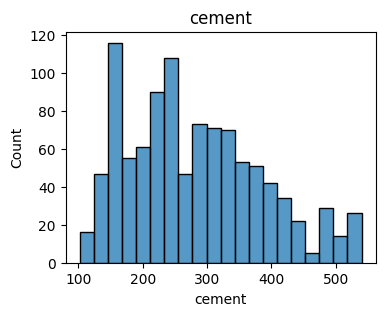

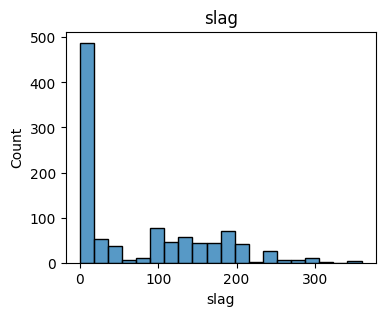

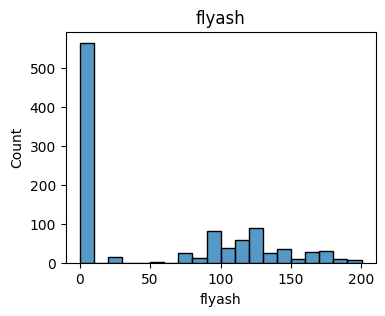

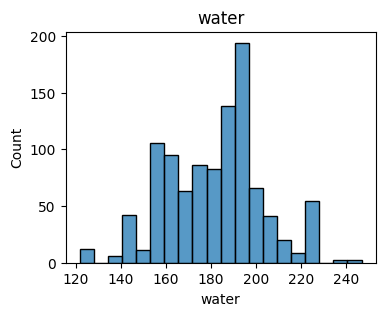

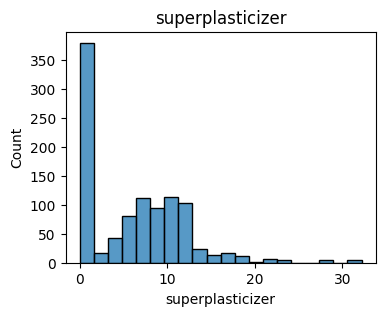

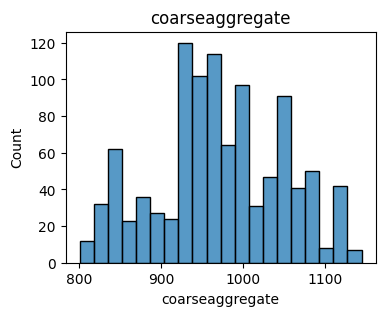

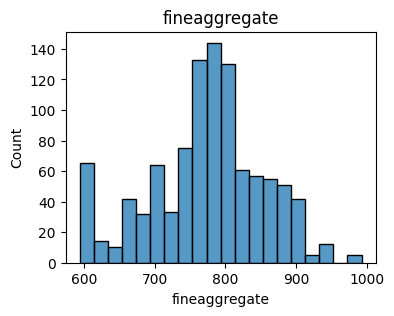

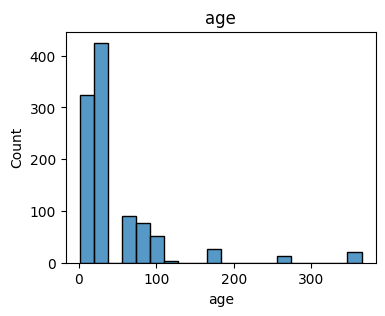

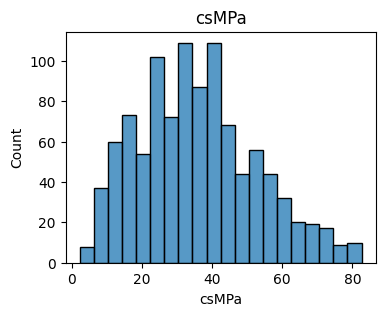

In [ ]:
for feat in df.columns:
  plt.figure(figsize=(4,3))
  sns.histplot(data=df, x=feat, bins=20)
  plt.title(feat)
  plt.show()

# Preprocessing

## Null Values

In [ ]:
df.isnull().sum()

cement              0
slag                0
flyash              0
water               0
superplasticizer    0
coarseaggregate     0
fineaggregate       0
age                 0
csMPa               0
dtype: int64

## Bucketize

<Axes: ylabel='Frequency'>

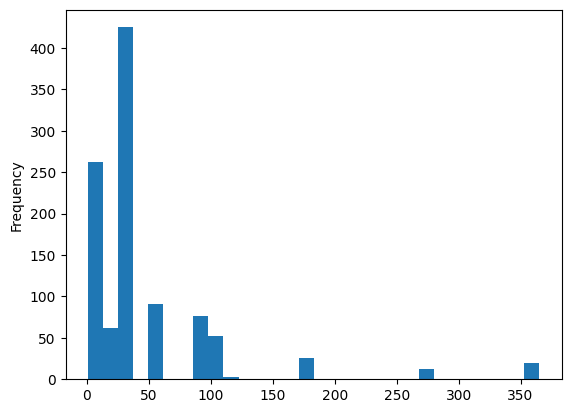

In [ ]:
df['age'].plot.hist(bins=30)

In [ ]:
df['age_bin'] = pd.cut(df['age'], bins=[-1, 75, 150, 250, 360], labels=['a', 'b', 'c', 'd'])

## One Hot Encoding

In [ ]:
df = pd.get_dummies(df, columns=['age_bin'])

In [ ]:
df['slag_0'] = (df['slag'] == 0 ) * 1
df['slag_0'].value_counts()

0    559
1    471
Name: slag_0, dtype: int64

In [ ]:
df['flyash_0'] = (df['flyash'] == 0 ) * 1
df['flyash_0'].value_counts()

1    566
0    464
Name: flyash_0, dtype: int64

In [ ]:
df['superplasticizer_0'] = (df['superplasticizer'] == 0 ) * 1
df['superplasticizer_0'].value_counts()

0    651
1    379
Name: superplasticizer_0, dtype: int64

# Modeling

## Train Test Split

In [ ]:
df.columns

Index(['cement', 'slag', 'flyash', 'water', 'superplasticizer',
       'coarseaggregate', 'fineaggregate', 'age', 'csMPa', 'age_bin_a',
       'age_bin_b', 'age_bin_c', 'age_bin_d', 'slag_0', 'flyash_0',
       'superplasticizer_0'],
      dtype='object')

In [ ]:
features = ['cement', 'slag', 'flyash',  'superplasticizer',
        'coarseaggregate', 'fineaggregate', 'age', 'csMPa', 'age_bin_a',
        'age_bin_b', 'age_bin_c', 'age_bin_d', 'slag_0', 'flyash_0',
        'superplasticizer_0']
target = ['water']

In [ ]:
X = df[features]
y = df[target]

In [ ]:
X_tr, X_ts, y_tr, y_ts = train_test_split(X, y, test_size=.3, random_state=42)

## standardize and PCA

In [ ]:
scaler = StandardScaler().fit(X_tr)
X_tr = scaler.transform(X_tr)
X_ts = scaler.transform(X_ts)

In [ ]:
pca = PCA().fit(X_tr)
X_tr = pca.transform(X_tr)
X_ts = pca.transform(X_ts)

## Decision Forest vs Random Forest vs  Extremely Randomized Trees

In [ ]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_tr, y_tr))
train_dataset = train_dataset.batch(30)


tfrf = tfdf.keras.RandomForestModel(tfdf.keras.Task.REGRESSION)
tfrf.compile(metrics=['mean_squared_error'])
tfrf.fit(train_dataset)

print(tfrf.summary())

Use /tmp/tmpz9233vlk as temporary training directory
Reading training dataset...
Training dataset read in 0:00:16.843142. Found 721 examples.
Training model...
Model trained in 0:00:02.842942
Compiling model...
Model compiled.
Model: "random_forest_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
Total params: 1 (1.00 Byte)
Trainable params: 0 (0.00 Byte)
Non-trainable params: 1 (1.00 Byte)
_________________________________________________________________
Type: "RANDOM_FOREST"
Task: REGRESSION
Label: "__LABEL"

Input Features (15):
	data:0.0
	data:0.1
	data:0.10
	data:0.11
	data:0.12
	data:0.13
	data:0.14
	data:0.2
	data:0.3
	data:0.4
	data:0.5
	data:0.6
	data:0.7
	data:0.8
	data:0.9

No weights

Variable Importance: INV_MEAN_MIN_DEPTH:
    1.  "data:0.7"  0.308259 ################
    2.  "data:0.0"  0.276438 #############
    3. "data:0.13"  0.152050 ###
    4.  "data:0.6"  0.145057 ##
    5. "d

In [ ]:
y_pred = tfrf.predict(X_tr)
score_tr = r2_score(y_tr, y_pred)
y_pred = tfrf.predict(X_ts)
score_ts = r2_score(y_ts, y_pred)
print(f'Train Score: {score_tr}')
print(f'Test Score: {score_ts}')

10/10 [==============================] - 0s 9ms/step
Train Score: 0.9432277037696181
Test Score: 0.8816604187984342


In [ ]:
rf = RandomForestRegressor().fit(X_tr, y_tr)
print(f'Train Score: {rf.score(X_tr, y_tr)}')
print(f'Test Score: {rf.score(X_ts, y_ts)}')

Train Score: 0.9808518783528597
Test Score: 0.8911054892726307


In [ ]:
et = ExtraTreesRegressor().fit(X_tr,y_tr)
print(f'Train Score: {et.score(X_tr, y_tr)}')
print(f'Test Score: {et.score(X_ts, y_ts)}')

Train Score: 0.9999984390571854
Test Score: 0.9311919861611262


## TensorFlow train_dataset

In [ ]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_tr, y_tr))
train_dataset = train_dataset.batch(30)

## Estimators

10/10 [==============================] - 0s 2ms/step


10/10 [==============================] - 0s 3ms/step


10/10 [==============================] - 0s 3ms/step


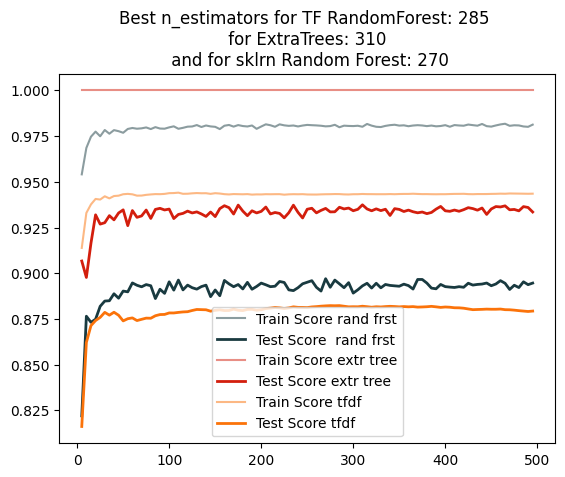

In [ ]:
# iterable
n_estimators = np.arange(5,500,5)

# lists
train_scores_rf = []
test_scores_rf = []
train_scores_et = []
test_scores_et = []
train_scores_rfdf = []
test_scores_rfdf = []


for e in n_estimators:

  # sklearn random forest
  rf = RandomForestRegressor(n_estimators=e).fit(X_tr, y_tr)
  train_scores_rf.append(rf.score(X_tr, y_tr))
  test_scores_rf.append(rf.score(X_ts, y_ts))

  # sklearn extremely randomized trees
  et = ExtraTreesRegressor(n_estimators=e).fit(X_tr,y_tr)
  train_scores_et.append(et.score(X_tr, y_tr))
  test_scores_et.append(et.score(X_ts, y_ts))

  # tensorflow random forest
  tfrf = tfdf.keras.RandomForestModel(task=tfdf.keras.Task.REGRESSION,
                                      num_trees=int(e), verbose=0)
  tfrf.compile(metrics=['mean_squared_error'])
  tfrf.fit(train_dataset)
  train_scores_rfdf.append(r2_score(y_tr, tfrf.predict(X_tr)))
  test_scores_rfdf.append(r2_score(y_ts, tfrf.predict(X_ts)))

# sklearn random forest
sns.lineplot(x=n_estimators, y=train_scores_rf, label='Train Score rand frst', color='#193A40', alpha=.5)
sns.lineplot(x=n_estimators, y=test_scores_rf, label='Test Score  rand frst', color='#193A40', lw=2)
# sklearn extremely randomized trees
sns.lineplot(x=n_estimators, y=train_scores_et, label='Train Score extr tree', color='#D31E0D', alpha=.5)
sns.lineplot(x=n_estimators, y=test_scores_et, label='Test Score extr tree', color='#D31E0D', lw=2)
# tensorflow random forest
sns.lineplot(x=n_estimators, y=train_scores_rfdf, label='Train Score tfdf', color='#FB730A', alpha=.5)
sns.lineplot(x=n_estimators, y=test_scores_rfdf, label='Test Score tfdf', color='#FB730A', lw=2)

# get best estimator
best_trees = n_estimators[np.argmax(test_scores_et)]
best_randforest = n_estimators[np.argmax(test_scores_rf)]
best_tfrf = n_estimators[np.argmax(test_scores_rfdf)]

# title and legend
plt.title(f'Best n_estimators for TF RandomForest: {best_tfrf} \n for ExtraTrees: {best_trees} \n and for sklrn Random Forest: {best_randforest}')
plt.legend()
plt.show()

## max_depth

10/10 [==============================] - 0s 3ms/step


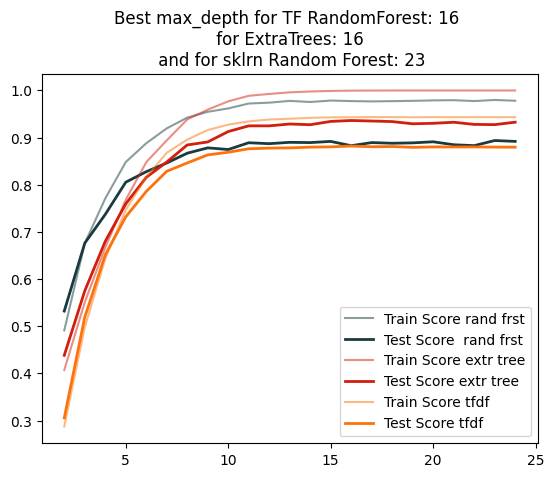

In [ ]:
# iterable
max_depths = np.arange(2,25)

# lists
train_scores_rf = []
test_scores_rf = []
train_scores_et = []
test_scores_et = []
train_scores_rfdf = []
test_scores_rfdf = []


for m in max_depths:

  # sklearn random forest
  rf = RandomForestRegressor(n_estimators=50, max_depth=m).fit(X_tr, y_tr)
  train_scores_rf.append(rf.score(X_tr, y_tr))
  test_scores_rf.append(rf.score(X_ts, y_ts))

  # sklearn extremely randomized trees
  et = ExtraTreesRegressor(n_estimators=85, max_depth=m).fit(X_tr,y_tr)
  train_scores_et.append(et.score(X_tr, y_tr))
  test_scores_et.append(et.score(X_ts, y_ts))

  # tensorflow random forest
  tfrf = tfdf.keras.RandomForestModel(task=tfdf.keras.Task.REGRESSION,
                                      num_trees=285, max_depth=int(m),
                                      verbose=0)
  tfrf.compile(metrics=['mean_squared_error'])
  tfrf.fit(train_dataset)
  train_scores_rfdf.append(r2_score(y_tr, tfrf.predict(X_tr)))
  test_scores_rfdf.append(r2_score(y_ts, tfrf.predict(X_ts)))

# sklearn random forest
sns.lineplot(x=max_depths, y=train_scores_rf, label='Train Score rand frst', color='#193A40', alpha=.5)
sns.lineplot(x=max_depths, y=test_scores_rf, label='Test Score  rand frst', color='#193A40', lw=2)
# sklearn extremely randomized trees
sns.lineplot(x=max_depths, y=train_scores_et, label='Train Score extr tree', color='#D31E0D', alpha=.5)
sns.lineplot(x=max_depths, y=test_scores_et, label='Test Score extr tree', color='#D31E0D', lw=2)
# tensorflow random forest
sns.lineplot(x=max_depths, y=train_scores_rfdf, label='Train Score tfdf', color='#FB730A', alpha=.5)
sns.lineplot(x=max_depths, y=test_scores_rfdf, label='Test Score tfdf', color='#FB730A', lw=2)

# get best estimator
best_trees = max_depths[np.argmax(test_scores_et)]
best_randforest = max_depths[np.argmax(test_scores_rf)]
best_tfrf = max_depths[np.argmax(test_scores_rfdf)]

# title and legend
plt.title(f'Best max_depth for TF RandomForest: {best_tfrf} \n for ExtraTrees: {best_trees} \n and for sklrn Random Forest: {best_randforest}')
plt.legend()
plt.show()

## min_examples - min_samples_leaf

10/10 [==============================] - 0s 2ms/step


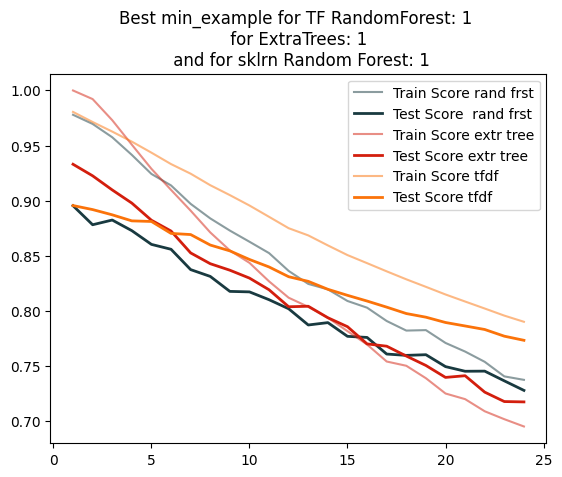

In [ ]:
# iterable
min_examples = np.arange(1,25)

# lists
train_scores_rf = []
test_scores_rf = []
train_scores_et = []
test_scores_et = []
train_scores_rfdf = []
test_scores_rfdf = []


for m in min_examples:

  # sklearn random forest
  rf = RandomForestRegressor(n_estimators=50, max_depth=16, min_samples_leaf=m).fit(X_tr, y_tr)
  train_scores_rf.append(rf.score(X_tr, y_tr))
  test_scores_rf.append(rf.score(X_ts, y_ts))

  # sklearn extremely randomized trees
  et = ExtraTreesRegressor(n_estimators=85, max_depth=23, min_samples_leaf=m).fit(X_tr,y_tr)
  train_scores_et.append(et.score(X_tr, y_tr))
  test_scores_et.append(et.score(X_ts, y_ts))

  # tensorflow random forest
  tfrf = tfdf.keras.RandomForestModel(task=tfdf.keras.Task.REGRESSION,
                                      num_trees=285, max_depth=18,
                                      min_examples=int(m),
                                      verbose=0)
  tfrf.compile(metrics=['mean_squared_error'])
  tfrf.fit(train_dataset)
  train_scores_rfdf.append(r2_score(y_tr, tfrf.predict(X_tr)))
  test_scores_rfdf.append(r2_score(y_ts, tfrf.predict(X_ts)))

# sklearn random forest
sns.lineplot(x=min_examples, y=train_scores_rf, label='Train Score rand frst', color='#193A40', alpha=.5)
sns.lineplot(x=min_examples, y=test_scores_rf, label='Test Score  rand frst', color='#193A40', lw=2)
# sklearn extremely randomized trees
sns.lineplot(x=min_examples, y=train_scores_et, label='Train Score extr tree', color='#D31E0D', alpha=.5)
sns.lineplot(x=min_examples, y=test_scores_et, label='Test Score extr tree', color='#D31E0D', lw=2)
# tensorflow random forest
sns.lineplot(x=min_examples, y=train_scores_rfdf, label='Train Score tfdf', color='#FB730A', alpha=.5)
sns.lineplot(x=min_examples, y=test_scores_rfdf, label='Test Score tfdf', color='#FB730A', lw=2)

# get best estimator
best_trees = min_examples[np.argmax(test_scores_et)]
best_randforest = min_examples[np.argmax(test_scores_rf)]
best_tfrf = min_examples[np.argmax(test_scores_rfdf)]

# title and legend
plt.title(f'Best min_example for TF RandomForest: {best_tfrf} \n for ExtraTrees: {best_trees} \n and for sklrn Random Forest: {best_randforest}')
plt.legend()
plt.show()

## max_num_nodes &  growing_strategy

10/10 [==============================] - 0s 3ms/step


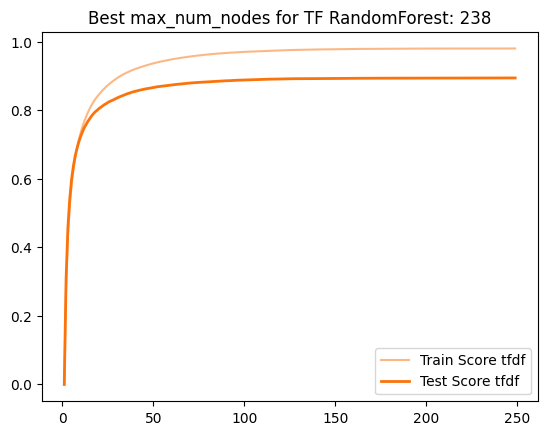

In [ ]:
# iterable
max_num_nodes = np.arange(1,250)

# lists
train_scores_rfdf = []
test_scores_rfdf = []


for m in max_num_nodes:
  # tensorflow random forest
  tfrf = tfdf.keras.RandomForestModel(task=tfdf.keras.Task.REGRESSION,
                                      num_trees=285, max_depth=18,
                                      min_examples=1, max_num_nodes=int(m),
                                      growing_strategy='BEST_FIRST_GLOBAL',
                                      verbose=0)
  tfrf.compile(metrics=['mean_squared_error'])
  tfrf.fit(train_dataset)
  train_scores_rfdf.append(r2_score(y_tr, tfrf.predict(X_tr)))
  test_scores_rfdf.append(r2_score(y_ts, tfrf.predict(X_ts)))

# tensorflow random forest
sns.lineplot(x=max_num_nodes, y=train_scores_rfdf, label='Train Score tfdf', color='#FB730A', alpha=.5)
sns.lineplot(x=max_num_nodes, y=test_scores_rfdf, label='Test Score tfdf', color='#FB730A', lw=2)

# get best estimator
best_tfrf = max_num_nodes[np.argmax(test_scores_rfdf)]

# title and legend
plt.title(f'Best max_num_nodes for TF RandomForest: {best_tfrf}')
plt.legend()
plt.show()

## Honest

10/10 [==============================] - 0s 3ms/step


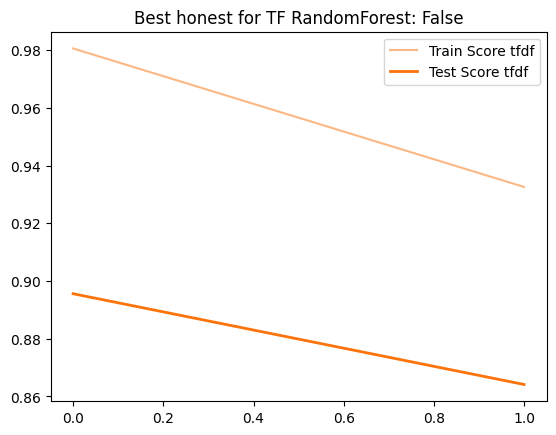

In [ ]:
# iterable
honests = [True, False]

# lists
train_scores_rfdf = []
test_scores_rfdf = []


for h in honests:
  # tensorflow random forest
  tfrf = tfdf.keras.RandomForestModel(task=tfdf.keras.Task.REGRESSION,
                                      num_trees=285, max_depth=18,
                                      min_examples=1,# max_num_nodes=238,
                                      # growing_strategy='BEST_FIRST_GLOBAL',
                                      honest=h,
                                      verbose=0)

  tfrf.compile(metrics=['mean_squared_error'])
  tfrf.fit(train_dataset)
  train_scores_rfdf.append(r2_score(y_tr, tfrf.predict(X_tr)))
  test_scores_rfdf.append(r2_score(y_ts, tfrf.predict(X_ts)))

# tensorflow random forest
sns.lineplot(x=honests, y=train_scores_rfdf, label='Train Score tfdf', color='#FB730A', alpha=.5)
sns.lineplot(x=honests, y=test_scores_rfdf, label='Test Score tfdf', color='#FB730A', lw=2)

# get best estimator
best_tfrf = honests[np.argmax(test_scores_rfdf)]

# title and legend
plt.title(f'Best honest for TF RandomForest: {best_tfrf}')
plt.legend()
plt.show()

## honest_fixed_separation


10/10 [==============================] - 0s 3ms/step


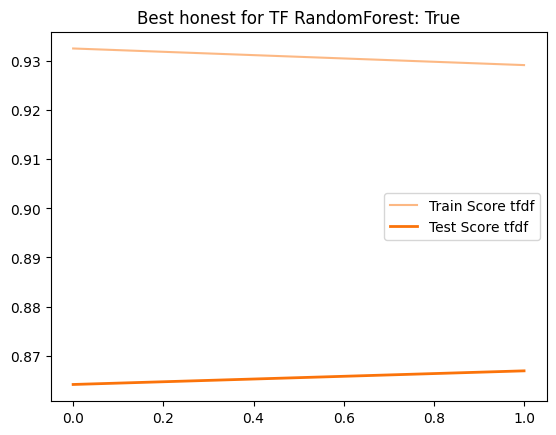

In [ ]:
# iterable
honests = [True, False]

# lists
train_scores_rfdf = []
test_scores_rfdf = []


for h in honests:
  # tensorflow random forest
  tfrf = tfdf.keras.RandomForestModel(task=tfdf.keras.Task.REGRESSION,
                                      num_trees=285, max_depth=18,
                                      min_examples=1,# max_num_nodes=238,
                                      # growing_strategy='BEST_FIRST_GLOBAL',
                                      honest=True, honest_fixed_separation=h,
                                      verbose=0)

  tfrf.compile(metrics=['mean_squared_error'])
  tfrf.fit(train_dataset)
  train_scores_rfdf.append(r2_score(y_tr, tfrf.predict(X_tr)))
  test_scores_rfdf.append(r2_score(y_ts, tfrf.predict(X_ts)))

# tensorflow random forest
sns.lineplot(x=honests, y=train_scores_rfdf, label='Train Score tfdf', color='#FB730A', alpha=.5)
sns.lineplot(x=honests, y=test_scores_rfdf, label='Test Score tfdf', color='#FB730A', lw=2)

# get best estimator
best_tfrf = honests[np.argmax(test_scores_rfdf)]

# title and legend
plt.title(f'Best honest for TF RandomForest: {best_tfrf}')
plt.legend()
plt.show()

## honest_ratio_leaf_examples

10/10 [==============================] - 0s 2ms/step


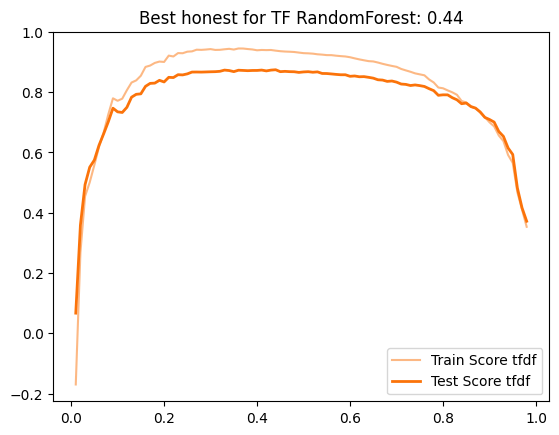

In [ ]:
# iterable
honests = np.arange(.01,.99,.01)

# lists
train_scores_rfdf = []
test_scores_rfdf = []


for h in honests:
  # tensorflow random forest
  tfrf = tfdf.keras.RandomForestModel(task=tfdf.keras.Task.REGRESSION,
                                      num_trees=285, max_depth=18,
                                      min_examples=1,# max_num_nodes=238,
                                      # growing_strategy='BEST_FIRST_GLOBAL',
                                      honest=True, honest_fixed_separation=True,
                                      honest_ratio_leaf_examples=h,
                                      verbose=0)

  tfrf.compile(metrics=['mean_squared_error'])
  tfrf.fit(train_dataset)
  train_scores_rfdf.append(r2_score(y_tr, tfrf.predict(X_tr)))
  test_scores_rfdf.append(r2_score(y_ts, tfrf.predict(X_ts)))

# tensorflow random forest
sns.lineplot(x=honests, y=train_scores_rfdf, label='Train Score tfdf', color='#FB730A', alpha=.5)
sns.lineplot(x=honests, y=test_scores_rfdf, label='Test Score tfdf', color='#FB730A', lw=2)

# get best estimator
best_tfrf = honests[np.argmax(test_scores_rfdf)]

# title and legend
plt.title(f'Best honest for TF RandomForest: {best_tfrf}')
plt.legend()
plt.show()

## Final Scores

In [ ]:
tfrf = tfdf.keras.RandomForestModel(tfdf.keras.Task.REGRESSION,num_trees=285, max_depth=18,
                                      min_examples=1, max_num_nodes=238,
                                      growing_strategy='BEST_FIRST_GLOBAL',
                                      # honest=True, honest_fixed_separation=True,
                                      # honest_ratio_leaf_examples=.44,
                                      verbose=0
                                    )
tfrf.compile(metrics=['mean_squared_error'])
tfrf.fit(train_dataset)

print(tfrf.summary())

test_score_tfrf = r2_score(y_ts, tfrf.predict(X_ts))

print(f'train score: {r2_score(y_tr, tfrf.predict(X_tr))} ')
print(f'test score: {r2_score(y_ts, tfrf.predict(X_ts))} ' )

Model: "random_forest_model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
Total params: 1 (1.00 Byte)
Trainable params: 0 (0.00 Byte)
Non-trainable params: 1 (1.00 Byte)
_________________________________________________________________
Type: "RANDOM_FOREST"
Task: REGRESSION
Label: "__LABEL"

Input Features (15):
	data:0.0
	data:0.1
	data:0.10
	data:0.11
	data:0.12
	data:0.13
	data:0.14
	data:0.2
	data:0.3
	data:0.4
	data:0.5
	data:0.6
	data:0.7
	data:0.8
	data:0.9

No weights

Variable Importance: INV_MEAN_MIN_DEPTH:
    1.  "data:0.7"  0.300554 ################
    2.  "data:0.0"  0.263001 #############
    3. "data:0.10"  0.135242 ##
    4. "data:0.13"  0.134047 ##
    5.  "data:0.6"  0.130113 ##
    6. "data:0.11"  0.126452 ##
    7.  "data:0.3"  0.126225 ##
    8.  "data:0.4"  0.120416 #
    9.  "data:0.1"  0.117960 #
   10.  "data:0.9"  0.113371 #
   11.  "data:0.2"  0.107670 
   12.  "data:0.

In [ ]:
rf = RandomForestRegressor(n_estimators=50, max_depth=16, min_samples_leaf=1).fit(X_tr, y_tr)
print(f'Train Score: {rf.score(X_tr, y_tr)}')
test_score_rf = rf.score(X_ts, y_ts)
print(f'Test Score: {rf.score(X_ts, y_ts)}')

Train Score: 0.9780842075613851
Test Score: 0.8892716662749752


In [ ]:
et = ExtraTreesRegressor(n_estimators=85, max_depth=23, min_samples_leaf=1).fit(X_tr,y_tr)
print(f'Train Score: {et.score(X_tr, y_tr)}')
test_score_et = et.score(X_ts, y_ts)
print(f'Test Score: {et.score(X_ts, y_ts)}')

Train Score: 0.99999809105465
Test Score: 0.9280602354390541


In [ ]:
test_scores = [test_score_tfrf, test_score_rf, test_score_et]
models = ['TensorFlow RandomForest', 'Sklearn RandomForest', 'ExtremeRandomTrees']


Text(0.5, 1.0, 'Test Scores Random Forests')

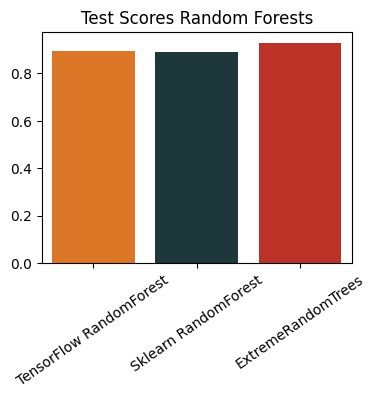

In [ ]:
plt.figure(figsize=(4,3))
sns.barplot(x=models, y=test_scores, palette=['#FB730A','#193A40','#D31E0D'])
plt.xticks(rotation=35)
plt.title('Test Scores Random Forests')